# **COVID-19 Cases, Tests, and Deaths Data Analysis & Forecasting & ML**


## ***📈 Introduction***

**The COVID-19 pandemic has significantly impacted global health, economies, and daily life. As governments and health organizations strive to manage the spread of the virus, data analysis plays a crucial role in understanding trends, identifying risk factors, and informing public health decisions. This project focuses on analyzing COVID-19 case data collected over several weeks, examining trends in cases, deaths, and testing rates within specific ZIP codes. By leveraging this data, we aim to derive insights that can help stakeholders make informed decisions regarding public health strategies and resource allocation.**

## 🎯 Goals of the Notebook

**Trend Analysis**: To analyze and visualize trends in COVID-19 cases, deaths, and testing data over time.

**Impact Assessment**: To assess the relationship between the number of tests conducted and the reported cases and deaths, helping to understand the effectiveness of testing strategies.

**Data Visualization**: To create comprehensive visualizations that effectively communicate findings and trends to stakeholders, including public health officials and the general public.

**Identifying Patterns**: To identify patterns or anomalies in the data that may warrant further investigation, providing valuable insights into the dynamics of the pandemic at the local level.

**Supporting Decision-Making**: To provide actionable insights that can support policymakers and public health officials in their responses to the ongoing pandemic.



## ***📊 Dataset Overview***
**This dataset contains information about Crime Prediction , including:**

**ZIP Code**: The geographical identifier for the area being analyzed.

**Week Number**: The week of the year in which the data was collected.

**Week Start**: The start date of the week for which the data applies.

**Cases - Weekly**: The number of new COVID-19 cases reported in that week.

**Cases - Cumulative**: The total number of COVID-19 cases reported up to that week.

**Tests - Weekly**: The number of COVID-19 tests conducted in that week.

**Deaths - Weekly**: The number of deaths attributed to COVID-19 reported in that week.

**Deaths - Cumulative**: The total number of COVID-19 deaths reported up to that week.

# ***Section 1: Importing Necessary Libraries***

In [353]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
import chardet as cha
from sklearn.preprocessing import LabelEncoder, StandardScaler , OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score


# ***Section 2: Reading Datasets and Initial Exploration***

##  **1.Loading the Dataset**





In [354]:
df = pd.read_csv('/content/COVID-19_Cases__Tests__and_Deaths_by_ZIP_Code_-_Historical.csv')

## **2. Displaying Basic Information About the Dataset**

In [355]:
df.head()

,ZIP Code,Week Number,Week Start,Week End,Cases - Weekly,Cases - Cumulative,Case Rate - Weekly,Case Rate - Cumulative,Tests - Weekly,Tests - Cumulative,...,Test Rate - Cumulative,Percent Tested Positive - Weekly,Percent Tested Positive - Cumulative,Deaths - Weekly,Deaths - Cumulative,Death Rate - Weekly,Death Rate - Cumulative,Population,Row ID,ZIP Code Location
0,60622,31,07/26/2020,08/01/2020,28.0,877.0,53.0,1661.2,1329.0,13148,...,24904.8,0.0,0.1,0,56,0.0,106.1,52793,60622-2020-31,POINT (-87.681818 41.902762)
1,60622,32,08/02/2020,08/08/2020,34.0,911.0,64.0,1725.6,1405.0,14553,...,27566.2,0.0,0.1,0,56,0.0,106.1,52793,60622-2020-32,POINT (-87.681818 41.902762)
2,60622,33,08/09/2020,08/15/2020,41.0,952.0,78.0,1803.3,1542.0,16095,...,30487.0,0.0,0.1,0,56,0.0,106.1,52793,60622-2020-33,POINT (-87.681818 41.902762)
3,60622,34,08/16/2020,08/22/2020,42.0,994.0,80.0,1882.8,1674.0,17769,...,33657.9,0.0,0.1,0,56,0.0,106.1,52793,60622-2020-34,POINT (-87.681818 41.902762)
4,60622,35,08/23/2020,08/29/2020,45.0,1039.0,85.0,1968.1,1540.0,19309,...,36574.9,0.0,0.1,0,56,0.0,106.1,52793,60622-2020-35,POINT (-87.681818 41.902762)


In [356]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13132 entries, 0 to 13131
Data columns (total 21 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   ZIP Code                              13132 non-null  object 
 1   Week Number                           13132 non-null  int64  
 2   Week Start                            13132 non-null  object 
 3   Week End                              13132 non-null  object 
 4   Cases - Weekly                        12909 non-null  float64
 5   Cases - Cumulative                    12909 non-null  float64
 6   Case Rate - Weekly                    12909 non-null  float64
 7   Case Rate - Cumulative                12909 non-null  float64
 8   Tests - Weekly                        12740 non-null  float64
 9   Tests - Cumulative                    13132 non-null  int64  
 10  Test Rate - Weekly                    13132 non-null  int64  
 11  Test Rate - Cum

In [357]:
df.shape

(13132, 21)

## **3.Descriptive Statistics**

In [358]:
df.describe()

,Week Number,Cases - Weekly,Cases - Cumulative,Case Rate - Weekly,Case Rate - Cumulative,Tests - Weekly,Tests - Cumulative,Test Rate - Weekly,Test Rate - Cumulative,Percent Tested Positive - Weekly,Percent Tested Positive - Cumulative,Deaths - Weekly,Deaths - Cumulative,Death Rate - Weekly,Death Rate - Cumulative,Population
count,13132.000000,12909.000000,12909.000000,12909.000000,12909.000000,12740.000000,13132.000000,13132.000000,1.313200e+04,13132.000000,13132.000000,13132.000000,13132.000000,13132.000000,13132.000000,13132.000000
mean,26.170119,63.458440,8344.924161,136.947401,17734.813309,1225.955024,129983.026652,2677.341989,2.957631e+05,0.056298,0.074147,0.636689,105.623896,1.218299,199.797525,46258.380064
std,14.871736,121.313518,7516.565007,245.224599,11955.509645,1400.608932,135184.120574,3240.396176,2.931501e+05,0.078874,0.064195,1.634849,91.039144,3.309388,138.398733,26835.033756
min,1.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,11.000000,1989.000000,32.000000,7127.600000,158.000000,10100.500000,369.000000,2.742940e+04,0.000000,0.000000,0.000000,19.000000,0.000000,81.800000,28804.000000
50%,25.000000,30.000000,6503.000000,76.000000,19382.600000,835.500000,86097.000000,1946.000000,2.331007e+05,0.000000,0.100000,0.000000,90.000000,0.000000,192.900000,46024.000000
75%,39.000000,70.000000,12839.000000,150.000000,27597.600000,1807.250000,223838.750000,3795.250000,4.949480e+05,0.100000,0.100000,1.000000,168.000000,1.200000,309.000000,68096.000000
max,53.000000,2212.000000,36570.000000,6266.000000,64450.100000,13173.000000,538868.000000,75755.000000,2.037212e+06,1.000000,0.500000,25.000000,365.000000,80.400000,540.600000,111850.000000


## **4-Checking for Missing & Duplicated Values**

In [359]:
df.isnull().sum()

,0
ZIP Code,0
Week Number,0
Week Start,0
Week End,0
Cases - Weekly,223
Cases - Cumulative,223
Case Rate - Weekly,223
Case Rate - Cumulative,223
Tests - Weekly,392
Tests - Cumulative,0


<Axes: >

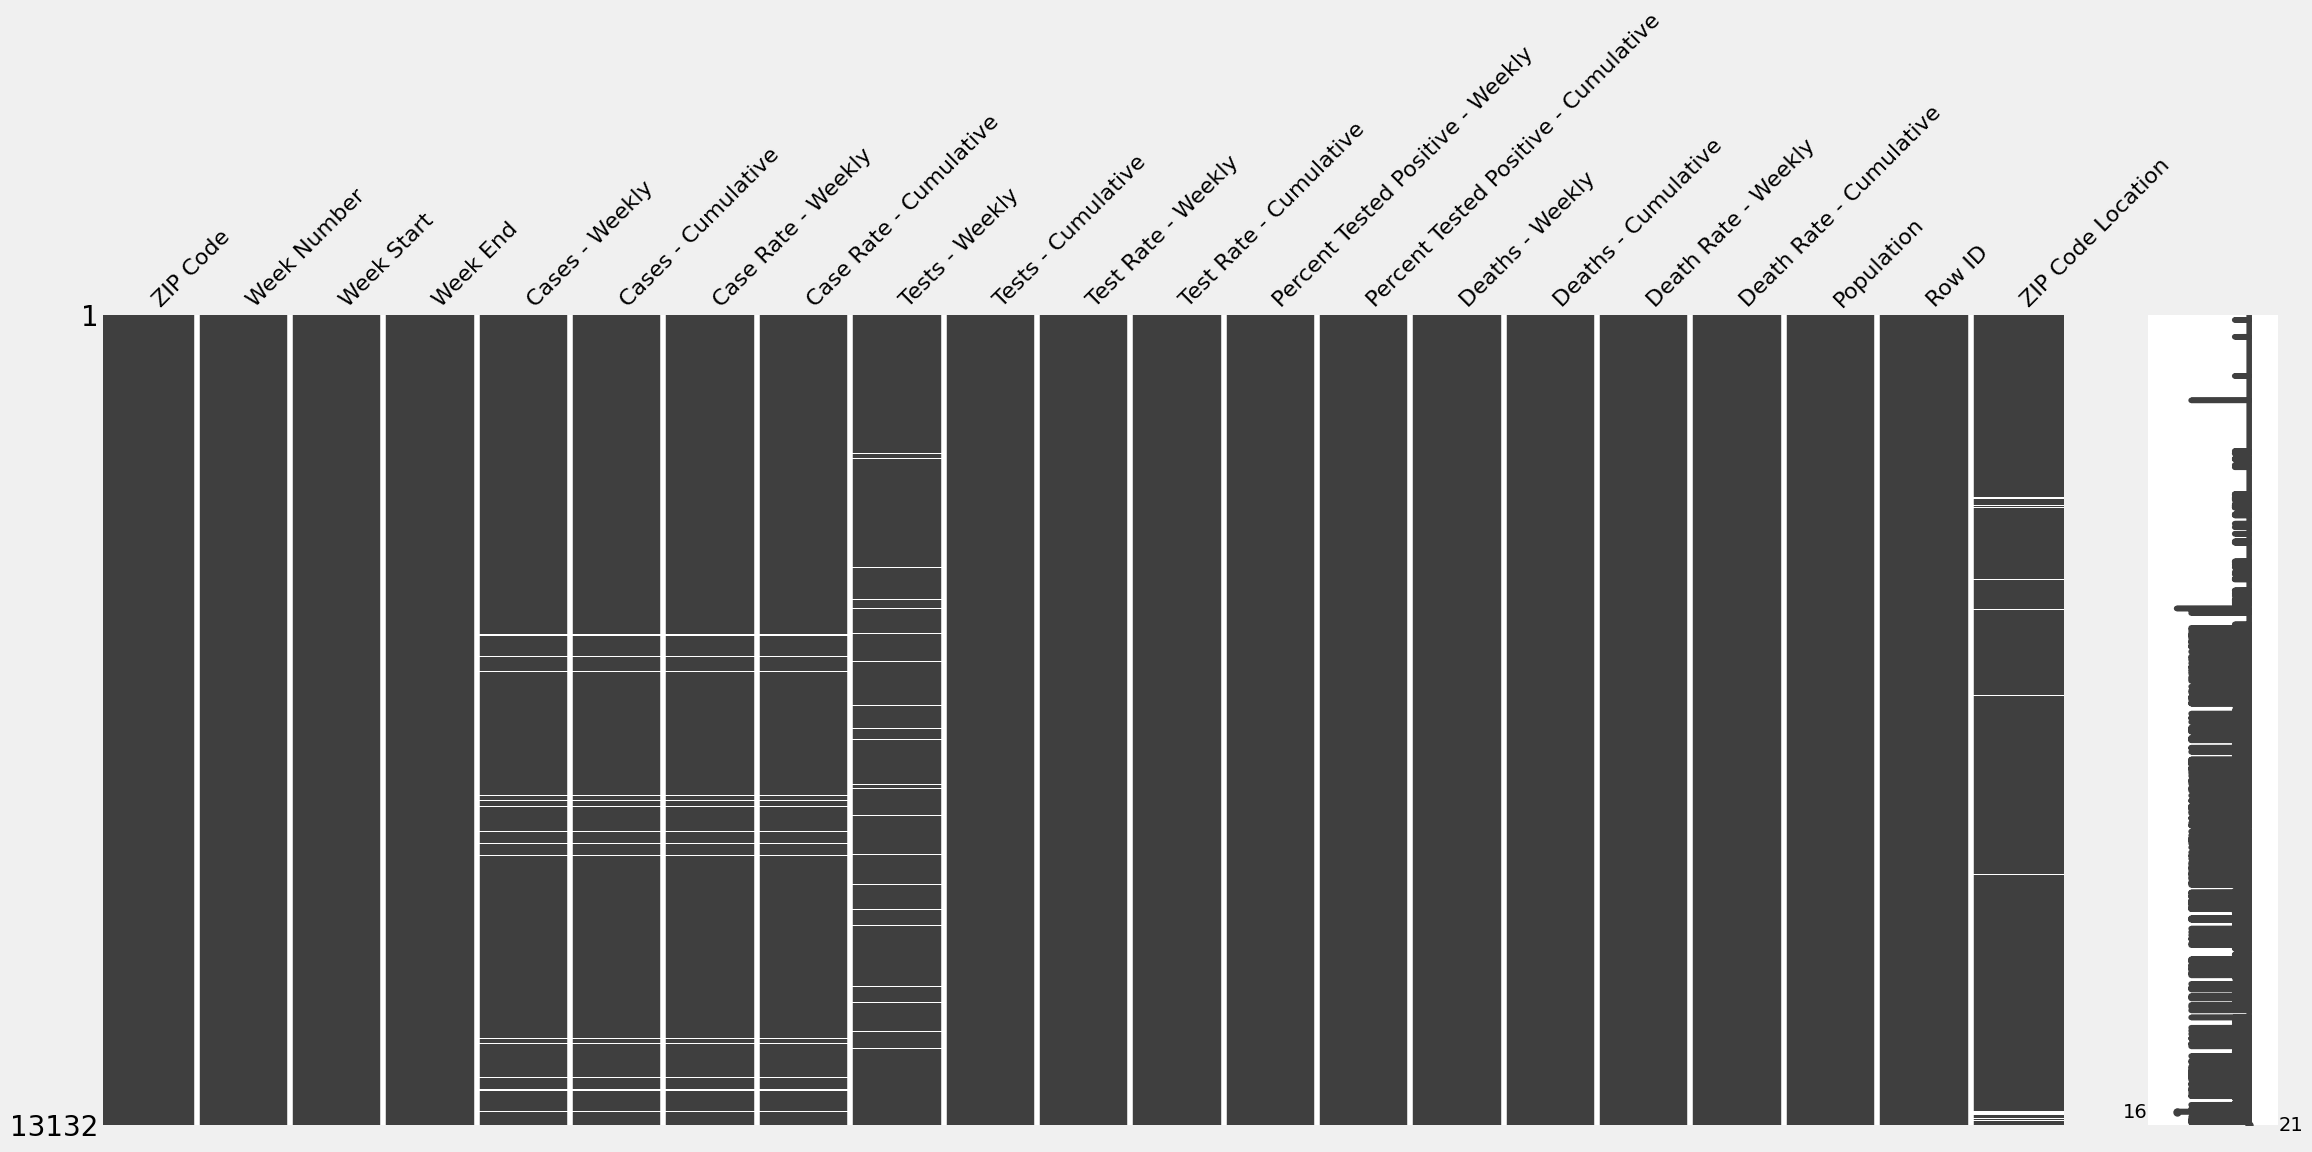

In [360]:
msno.matrix(df)

In [361]:
df.duplicated().sum()

0

# ***Section 3: Data Cleaning and Preprocessing***

###  **1. Missing or Duplicated Data**

In [362]:
df['Cases - Weekly'].fillna(df['Cases - Weekly'].mean(), inplace=True)
df['Cases - Cumulative'].fillna(df['Cases - Cumulative'].mean(), inplace=True)
df['Case Rate - Weekly'].fillna(df['Case Rate - Weekly'].mean(), inplace=True)
df['Case Rate - Cumulative'].fillna(df['Case Rate - Cumulative'].mean(), inplace=True)

In [363]:
df['Tests - Weekly'].fillna(df['Tests - Weekly'].mean(), inplace=True)


In [364]:
df['ZIP Code Location'].fillna(df['ZIP Code Location'].mode()[0], inplace=True)


In [365]:
missing_values_after = df.isnull().sum()
print(missing_values_after[missing_values_after > 0])

Series([], dtype: int64)


### **2.  Feature Engineering**





In [366]:
df['Week Start'] = pd.to_datetime(df['Week Start'])
df['Week End'] = pd.to_datetime(df['Week End'])

In [367]:
df['Week_Start_Month'] = df['Week Start'].dt.month_name()
df['Week Start Year'] = df['Week Start'].dt.year

# ***Section 4: Exploratory Data Analysis (EDA)***

In [368]:
num_cols = df.select_dtypes(include=np.number).columns
cat_cols = df.select_dtypes(exclude=np.number).columns

## **1.  Basic EDA**

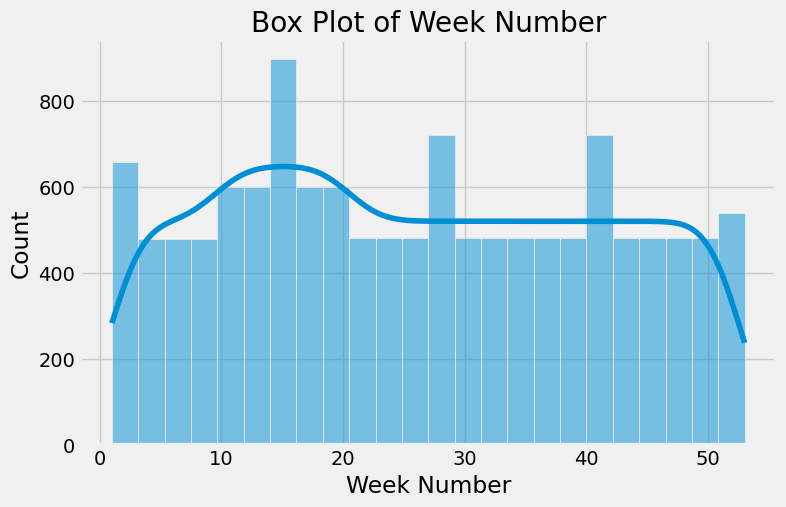

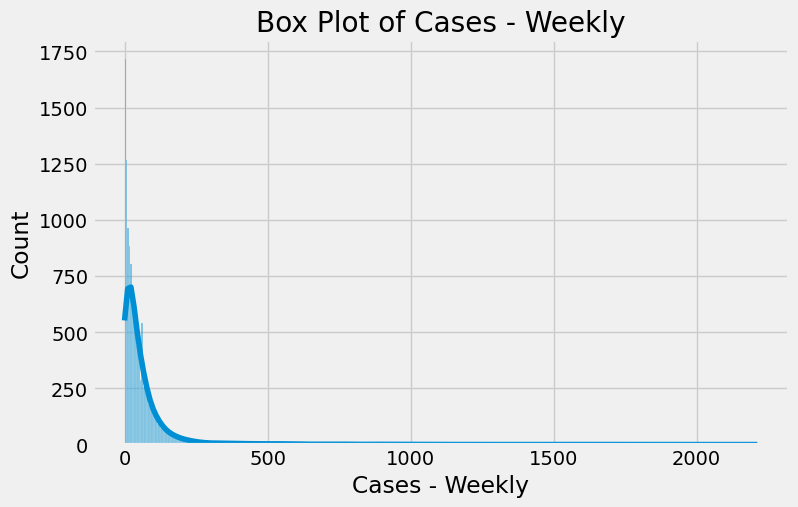

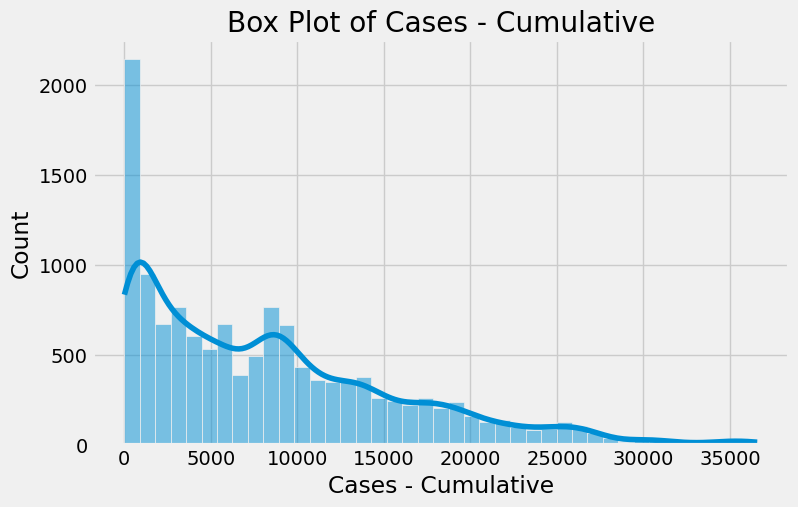

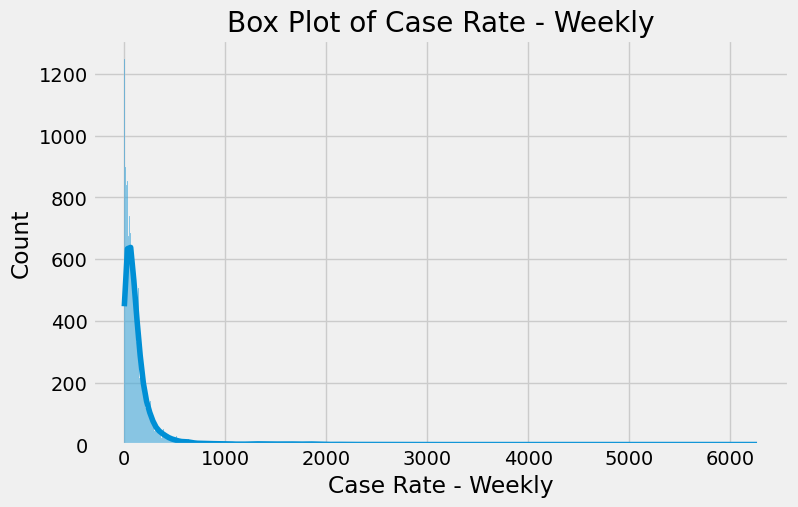

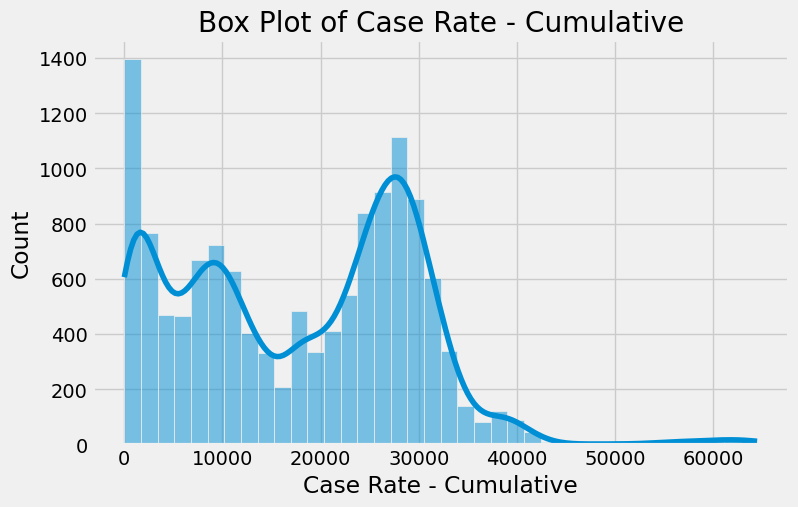

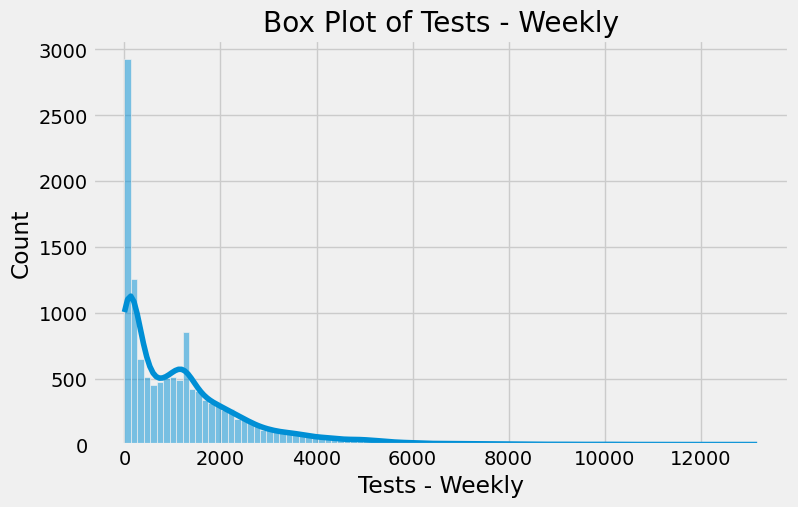

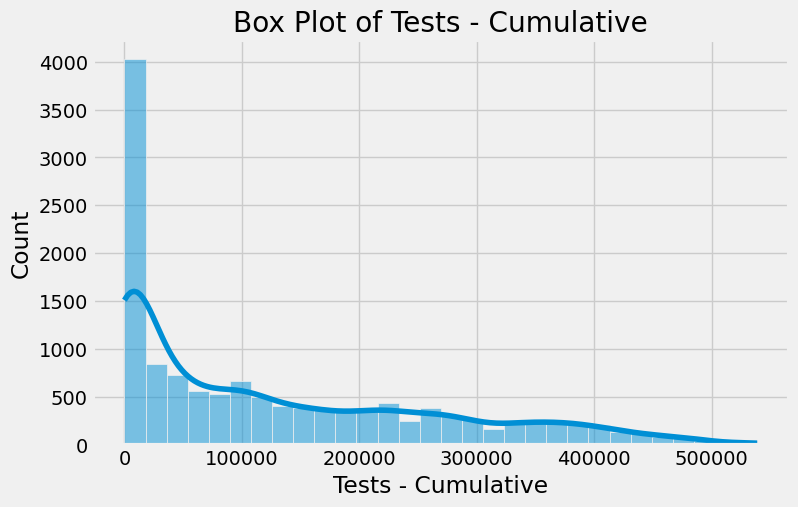

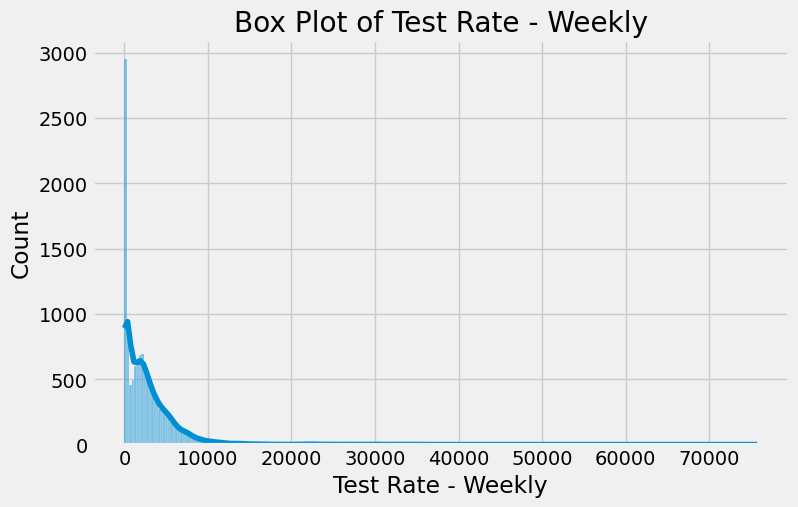

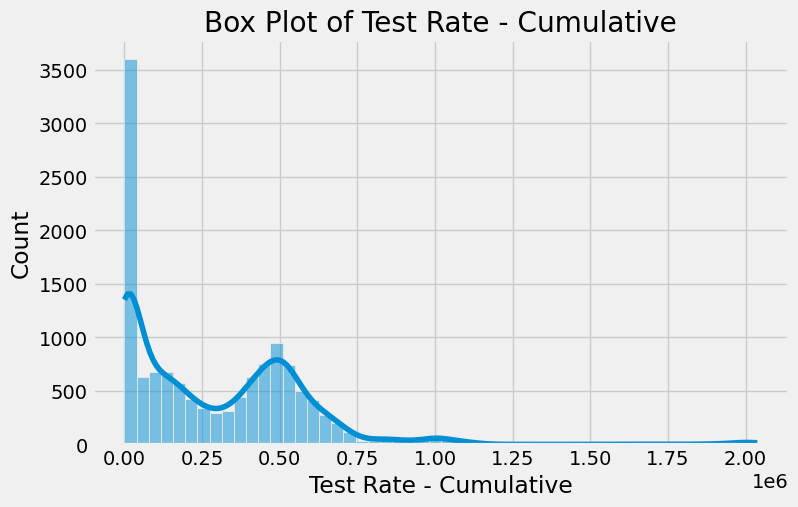

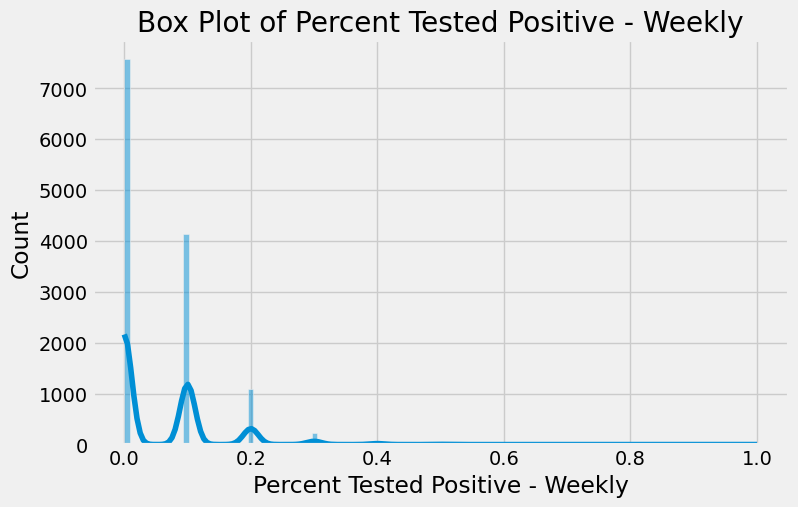

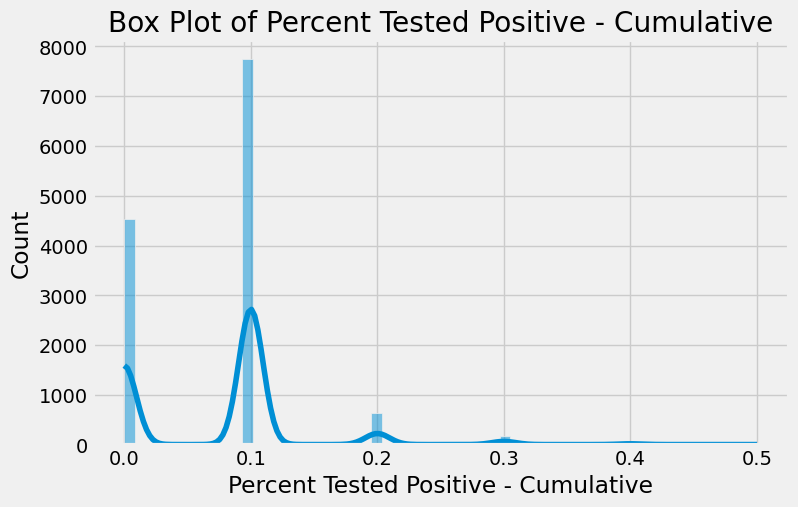

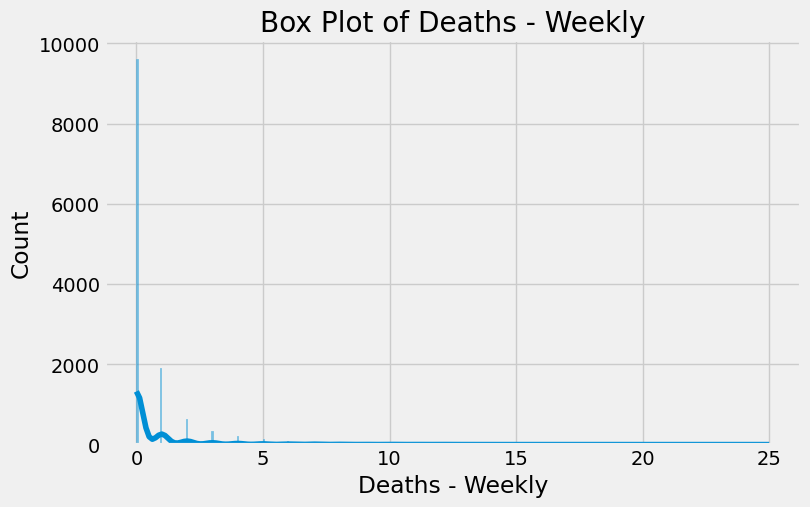

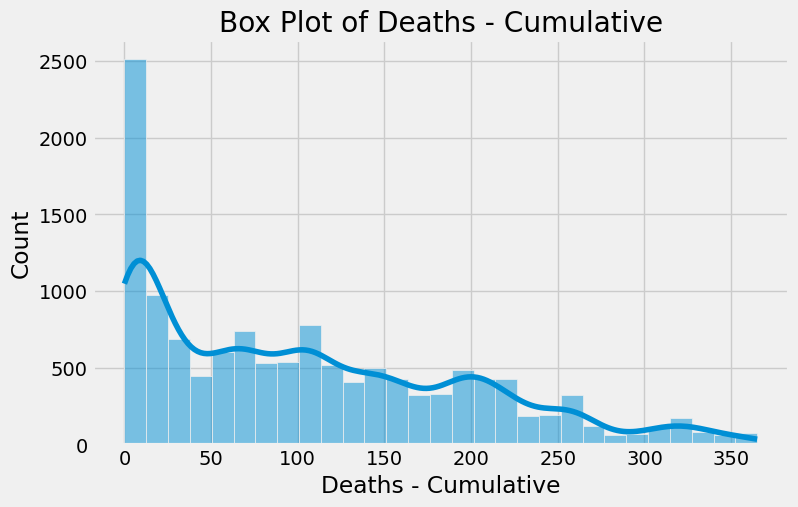

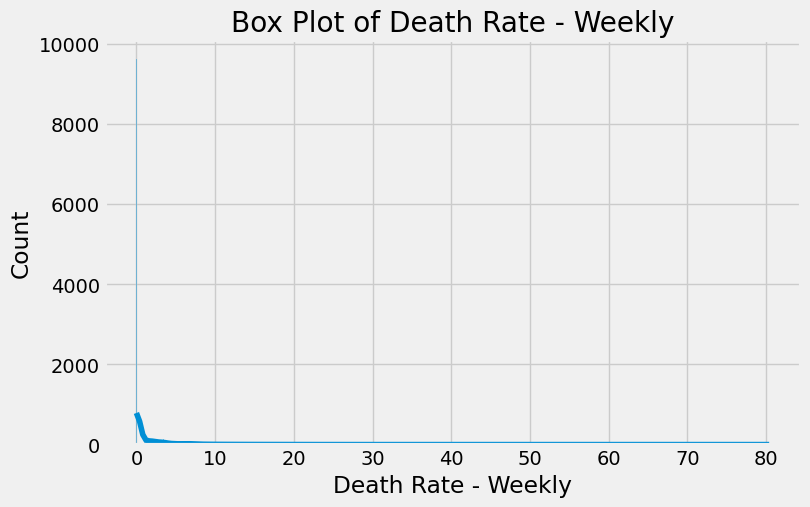

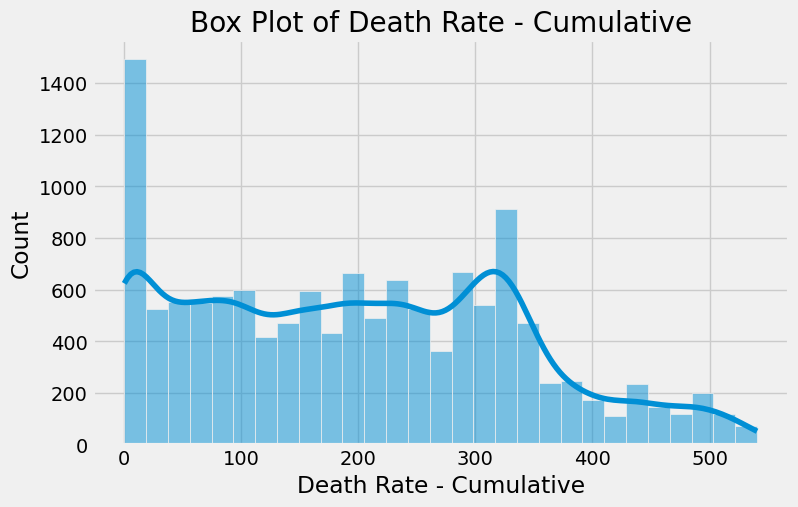

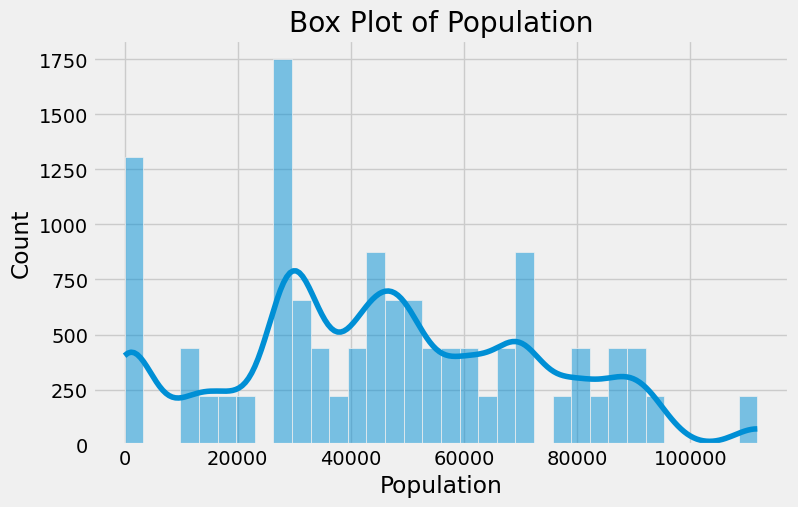

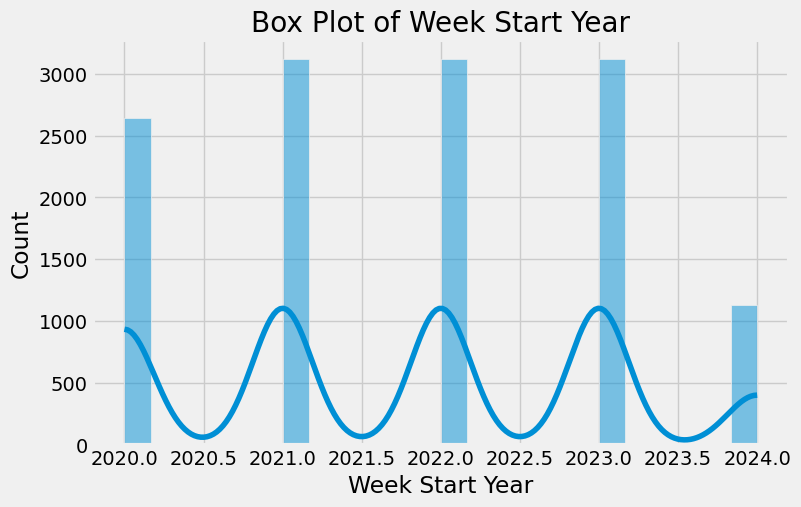

In [283]:
for col in num_cols:
  plt.figure(figsize=(8, 5))
  sns.histplot(df[col] , kde=True)
  plt.title(f'Box Plot of {col}')
  plt.show()

## **2.  Medium EDA(Exploring Relationships and Patterns)**

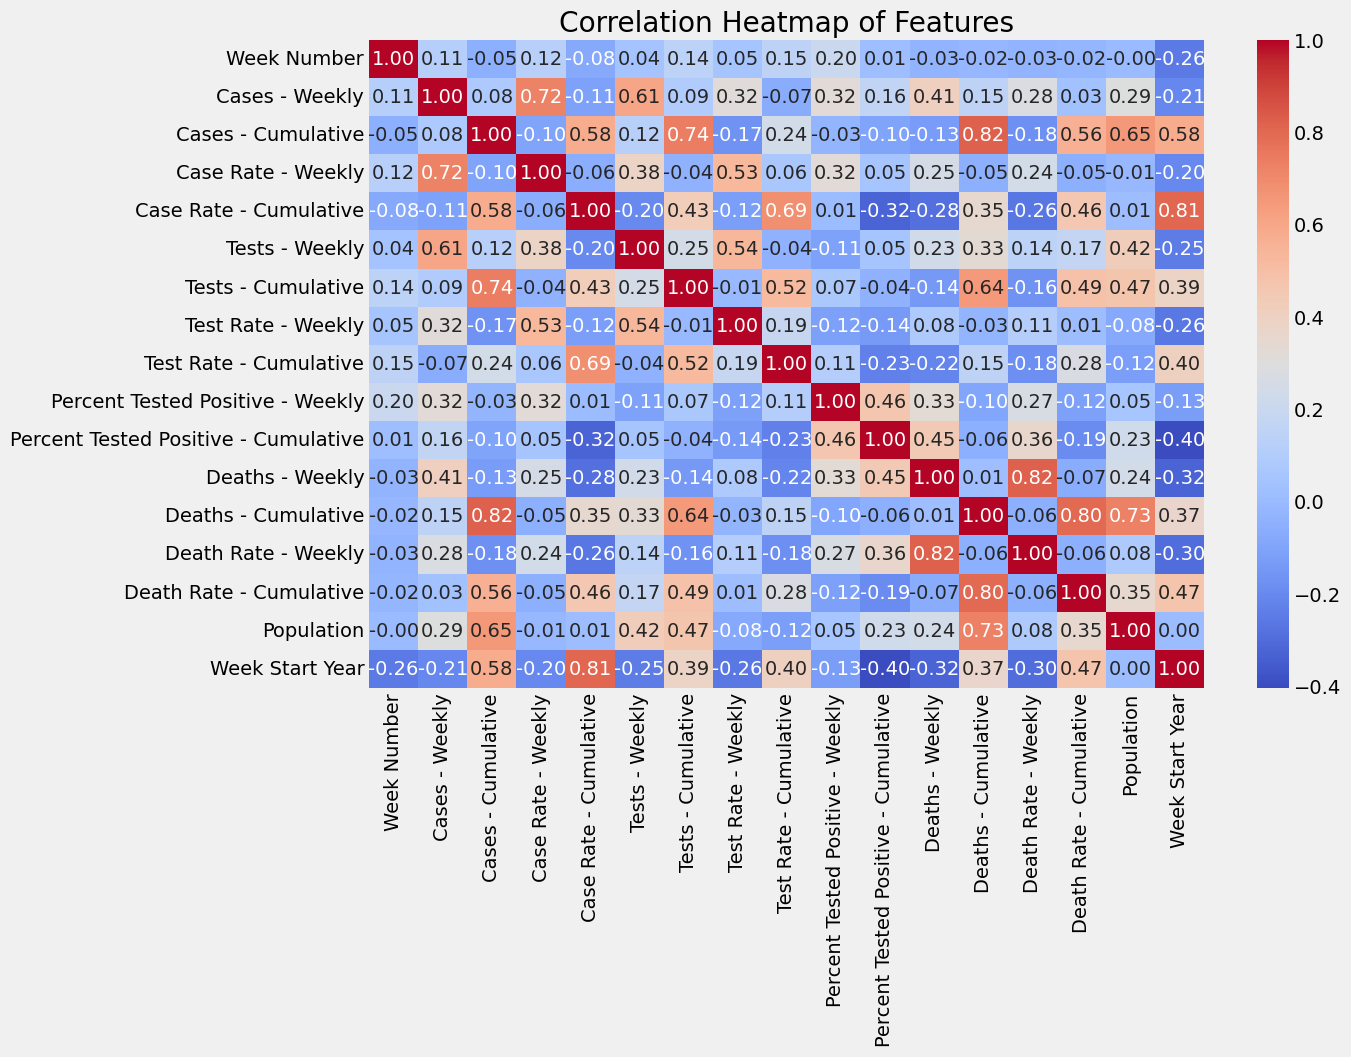

In [284]:
plt.figure(figsize=(12, 8))
correlation_matrix = df[num_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap of Features')
plt.show()


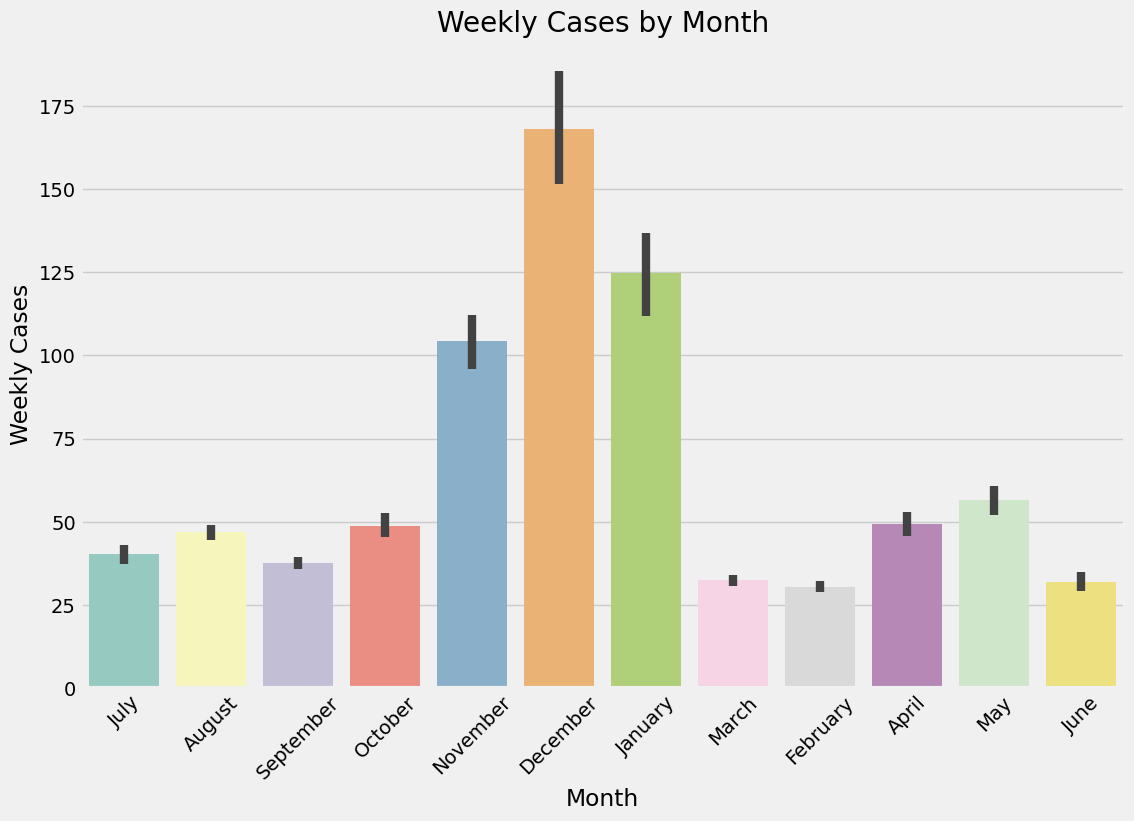

In [285]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Week_Start_Month', y='Cases - Weekly', data=df , palette='Set3')
plt.title('Weekly Cases by Month')
plt.xlabel('Month')
plt.ylabel('Weekly Cases')
plt.xticks(rotation=45)
plt.show()

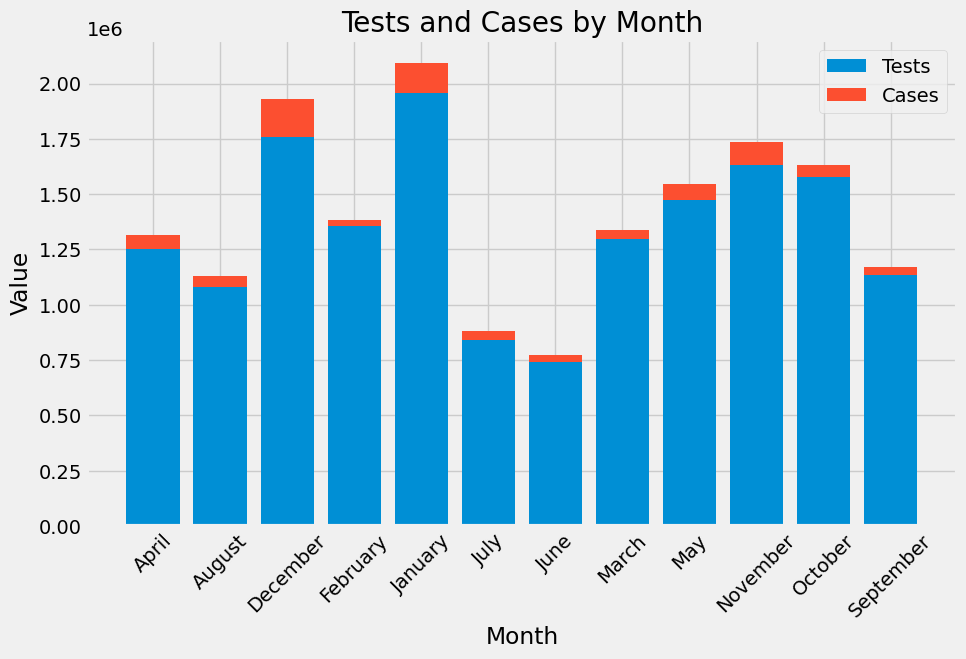

In [286]:
tests_df = df.groupby('Week_Start_Month')['Tests - Weekly'].sum().reset_index()
cases_df = df.groupby('Week_Start_Month')['Cases - Weekly'].sum().reset_index()

stacked_data = pd.merge(tests_df, cases_df, on='Week_Start_Month')

plt.figure(figsize=(10, 6))
plt.bar(stacked_data['Week_Start_Month'], stacked_data['Tests - Weekly'], label='Tests')
plt.bar(stacked_data['Week_Start_Month'], stacked_data['Cases - Weekly'], label='Cases', bottom=stacked_data['Tests - Weekly'])
plt.xlabel('Month')
plt.ylabel('Value')
plt.title('Tests and Cases by Month')
plt.xticks(rotation=45)
plt.legend()
plt.show()


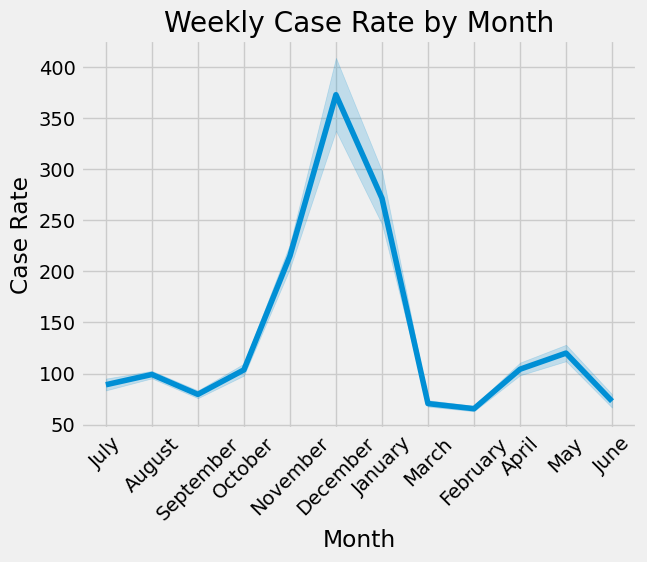

In [287]:
sns.lineplot(x='Week_Start_Month', y='Case Rate - Weekly', data=df , palette='Set3')
plt.title('Weekly Case Rate by Month')
plt.xlabel('Month')
plt.ylabel('Case Rate')
plt.xticks(rotation=45)
plt.show()

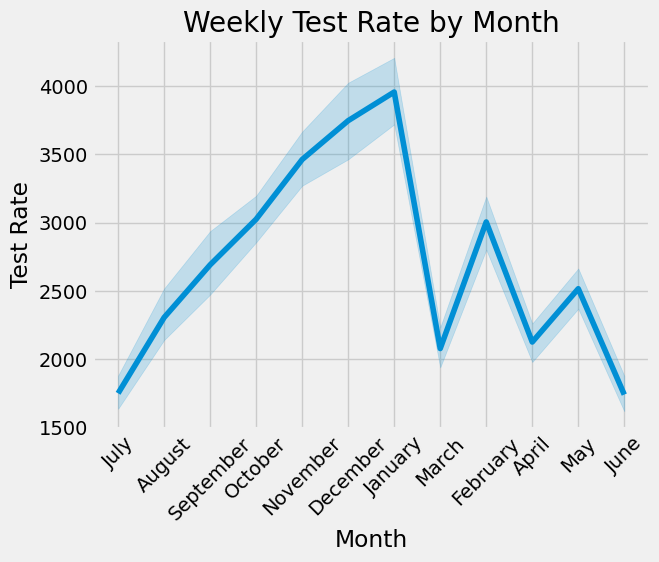

In [288]:
sns.lineplot(x='Week_Start_Month', y='Test Rate - Weekly', data=df , palette='Set3')
plt.title('Weekly Test Rate by Month')
plt.xlabel('Month')
plt.ylabel('Test Rate')
plt.xticks(rotation=45)
plt.show()

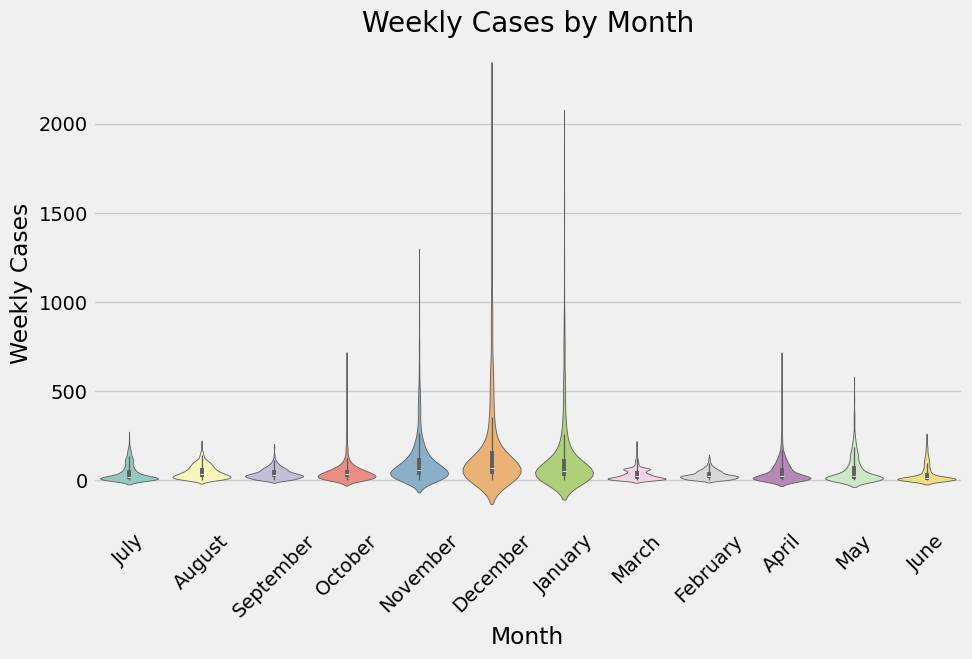

In [289]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Week_Start_Month', y='Cases - Weekly', data=df , palette='Set3')
plt.title('Weekly Cases by Month')
plt.xlabel('Month')
plt.ylabel('Weekly Cases')
plt.xticks(rotation=45)
plt.show()

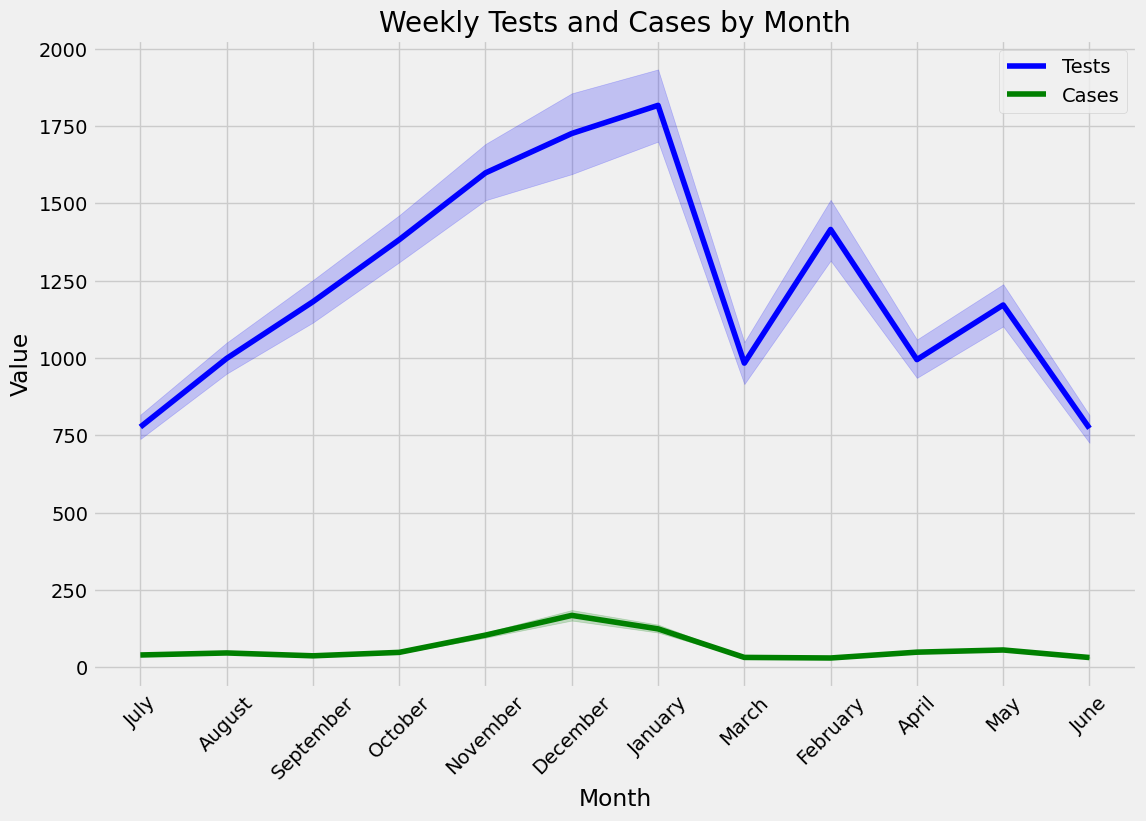

In [290]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=df, x='Week_Start_Month', y='Tests - Weekly', color='blue', label='Tests')
sns.lineplot(data=df, x='Week_Start_Month', y='Cases - Weekly', color='green', label='Cases')
plt.title('Weekly Tests and Cases by Month')
plt.xlabel('Month')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend()
plt.show()

## **3.  Advanced EDA(Deeper Insights)**

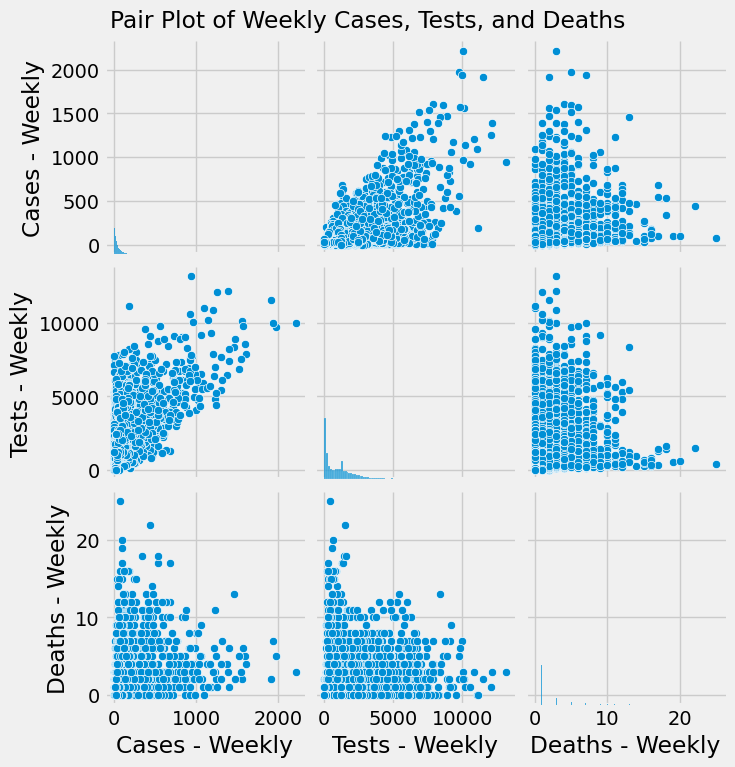

In [291]:
sns.pairplot(df[['Cases - Weekly', 'Tests - Weekly', 'Deaths - Weekly']])
plt.suptitle('Pair Plot of Weekly Cases, Tests, and Deaths', y=1.02)
plt.show()

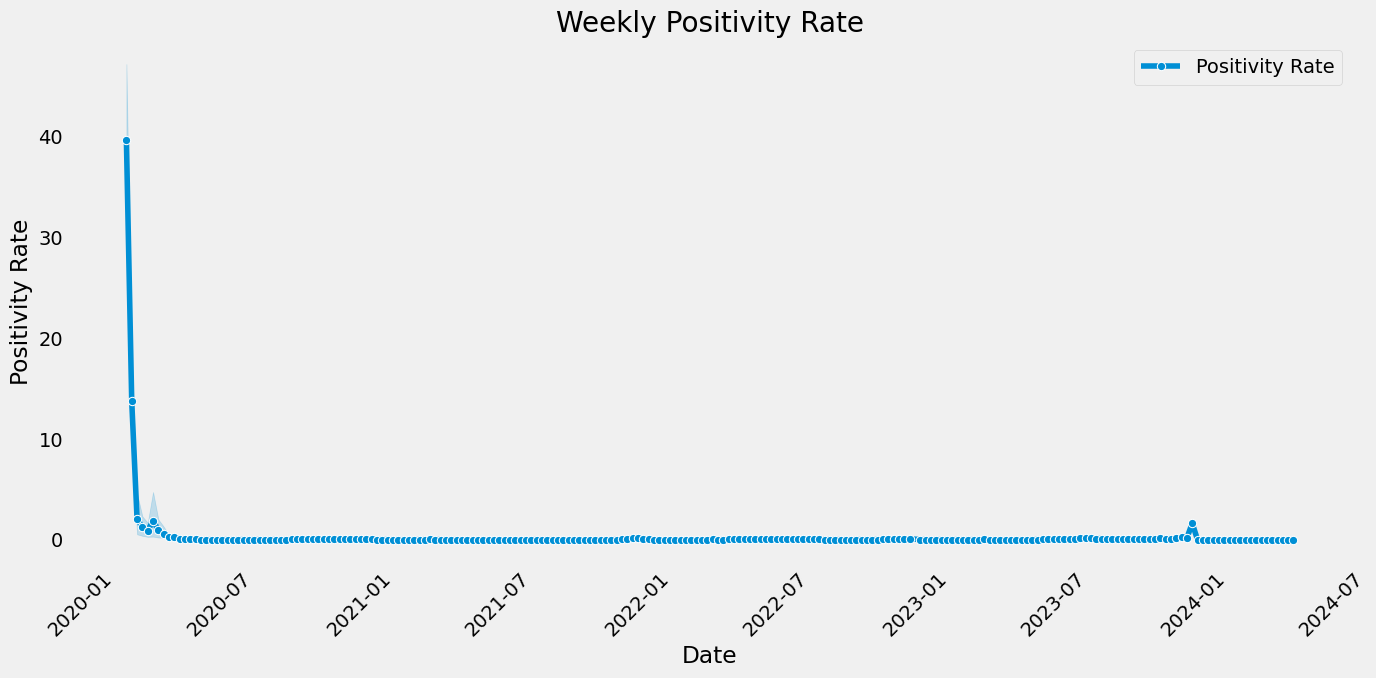

In [292]:
df['Positivity Rate'] = df['Cases - Weekly'] / df['Tests - Weekly'].replace(0, np.nan)

plt.figure(figsize=(14, 7))
sns.lineplot(x='Week Start', y='Positivity Rate', data=df, marker='o', label='Positivity Rate')
plt.title('Weekly Positivity Rate')
plt.xlabel('Date')
plt.ylabel('Positivity Rate')
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

# **Section 5: Machine Learning**

### **5.1 Handling outliers**

In [293]:
outliers_cols = ['Cases - Weekly','Cases - Cumulative','Case Rate - Weekly','Case Rate - Cumulative','Tests - Weekly', 'Test Rate - Weekly', 'Test Rate - Cumulative', 'Percent Tested Positive - Weekly', 'Percent Tested Positive - Cumulative', 'Deaths - Weekly', 'Death Rate - Weekly' ]

In [294]:
for col in outliers_cols:
  if df[col].dtype == 'object':
    try:
      df[col] = pd.to_numeric(df[col], errors='coerce')
    except ValueError:
      print(f"Could not convert column '{col}' to numeric. Skipping...")
      continue
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

### **5.2 Encoding categorical Data**

In [298]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13132 entries, 0 to 13131
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Cases - Weekly                        13132 non-null  float64
 1   Cases - Cumulative                    13132 non-null  float64
 2   Case Rate - Weekly                    13132 non-null  float64
 3   Case Rate - Cumulative                13132 non-null  float64
 4   Tests - Weekly                        13132 non-null  float64
 5   Tests - Cumulative                    13132 non-null  int64  
 6   Test Rate - Weekly                    13132 non-null  float64
 7   Test Rate - Cumulative                13132 non-null  float64
 8   Percent Tested Positive - Weekly      13132 non-null  float64
 9   Percent Tested Positive - Cumulative  13132 non-null  float64
 10  Deaths - Weekly                       13132 non-null  float64
 11  Deaths - Cumula

In [295]:
df.drop(['ZIP Code','Week Number','Week End','ZIP Code Location','Positivity Rate','Row ID','Week Start'],axis=1,inplace=True)

In [300]:
onehot_cols=['Week_Start_Month']
df = pd.get_dummies(df, columns=onehot_cols, drop_first=True)



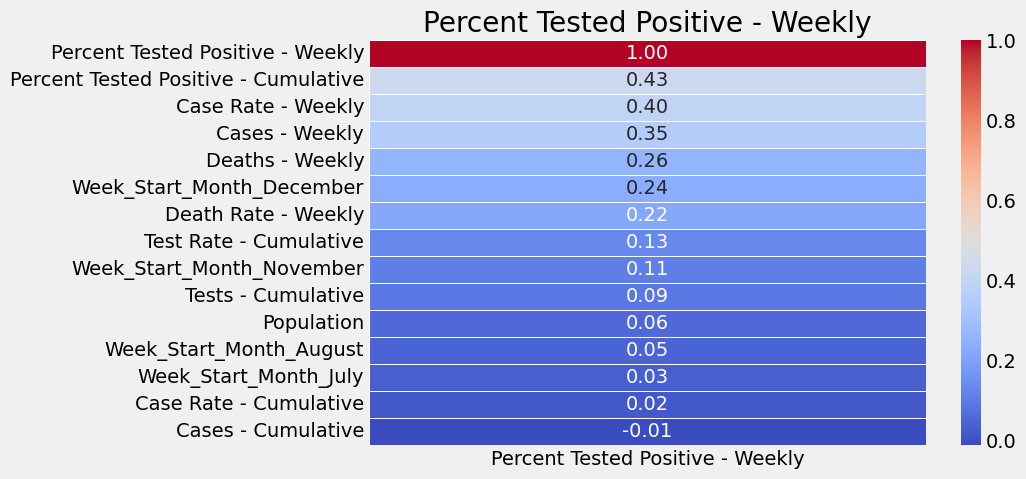

In [301]:
correlation_matrix = df.corr(numeric_only=True)
correlation_price = correlation_matrix['Percent Tested Positive - Weekly'].sort_values(ascending=False).head(15)
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_price.to_frame(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Percent Tested Positive - Weekly')
plt.show()

### **5.3 Machine Learning**

In [335]:
threshold = 0.1

correlation_matrix = df.corr()
high_corr_features = correlation_matrix.index[abs(correlation_matrix["Percent Tested Positive - Weekly"]) > threshold].tolist()
high_corr_features.remove("Percent Tested Positive - Weekly")
print(high_corr_features)



['Cases - Weekly', 'Case Rate - Weekly', 'Tests - Weekly', 'Test Rate - Weekly', 'Test Rate - Cumulative', 'Percent Tested Positive - Cumulative', 'Deaths - Weekly', 'Death Rate - Weekly', 'Death Rate - Cumulative', 'Week Start Year', 'Week_Start_Month_December', 'Week_Start_Month_February', 'Week_Start_Month_November']


In [336]:
X_selected = df[high_corr_features]
Y = df['Percent Tested Positive - Weekly']

In [337]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, Y, test_size=0.2, random_state=42)

In [338]:
model1 = LinearRegression()
model1.fit(X_train , y_train)

LinearRegression()

In [339]:
y_pred1 = model1.predict(X_test)

In [340]:
model2 = DecisionTreeRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=10)
model2.fit(X_train , y_train)

DecisionTreeRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=10)

In [341]:
y_pred2 = model2.predict(X_test)

In [342]:
model3 = RandomForestRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=2)
model3.fit(X_train , y_train)

RandomForestRegressor(max_depth=10, min_samples_leaf=4)

In [343]:
y_pred3 = model3.predict(X_test)

In [344]:
model4 = HistGradientBoostingRegressor(learning_rate=0.1 , max_iter=100 , max_leaf_nodes=33)
model4.fit(X_train, y_train)

HistGradientBoostingRegressor(max_leaf_nodes=33)

In [345]:
y_pred4 = model4.predict(X_test)

In [346]:
Param_grid = {
    'n_neighbors': [5, 55, 85],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]}

model5 = KNeighborsRegressor()
grid_search = GridSearchCV(estimator=model5, param_grid=Param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print("Best Parameters:", best_params)

Best Parameters: {'n_neighbors': 5, 'p': 1, 'weights': 'distance'}


In [347]:
model5 = KNeighborsRegressor(n_neighbors=55, p=1, weights='uniform')
model5.fit(X_train , y_train)

KNeighborsRegressor(n_neighbors=55, p=1)

In [348]:
y_pred5 = model5.predict(X_test)

In [349]:
model6 = GradientBoostingRegressor(learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100)
model6.fit(X_train, y_train)


GradientBoostingRegressor()

In [350]:
y_pred6 = model6.predict(X_test)

In [351]:
def evaluate_model(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, r2

for model in [model1, model2, model3, model4, model5 , model6]:
    y_pred = model.predict(X_test)
    mse, r2 = evaluate_model(y_test, y_pred)
    print(f"{model.__class__.__name__}")
    print(f"MSE: {mse}")
    print(f"R2 Score: {r2 * 100:.2f}%"+'\n')

LinearRegression
MSE: 0.0023361501662147884
R2 Score: 54.86%

DecisionTreeRegressor
MSE: 0.0010118684519952671
R2 Score: 80.45%

RandomForestRegressor
MSE: 0.0007969687896298404
R2 Score: 84.60%

HistGradientBoostingRegressor
MSE: 0.0007865931832635917
R2 Score: 84.80%

KNeighborsRegressor
MSE: 0.002932108712134321
R2 Score: 43.35%

GradientBoostingRegressor
MSE: 0.0010633710329390955
R2 Score: 79.45%



In [352]:
results = []
for model in [model1, model2, model3, model4, model5 , model6]:

    train_mse, train_r2 = evaluate_model(y_train, model.predict(X_train))
    test_mse, test_r2 = evaluate_model(y_test, model.predict(X_test))

    results.append({
        'Model': model.__class__.__name__,
        'Train Score %': round(train_r2*100,2),
        'Test Score %': round(test_r2*100,2) })

results_df = pd.DataFrame(results)
display(results_df)

,Model,Train Score %,Test Score %
0,LinearRegression,54.72,54.86
1,DecisionTreeRegressor,90.11,80.45
2,RandomForestRegressor,90.91,84.60
3,HistGradientBoostingRegressor,89.74,84.80
4,KNeighborsRegressor,45.87,43.35
5,GradientBoostingRegressor,81.58,79.45


# 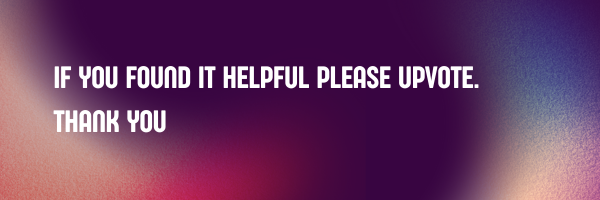